In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.shape

(891, 12)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

<Axes: >

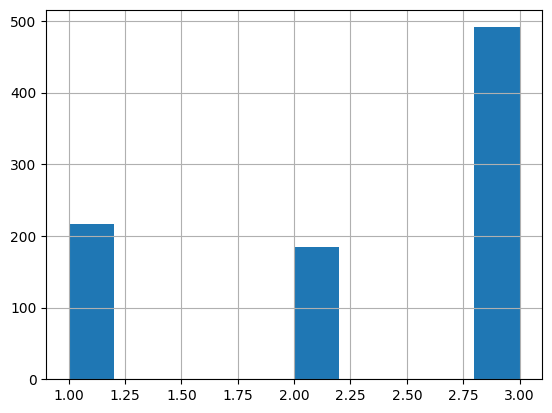

In [9]:
df.Pclass.hist()

<Axes: >

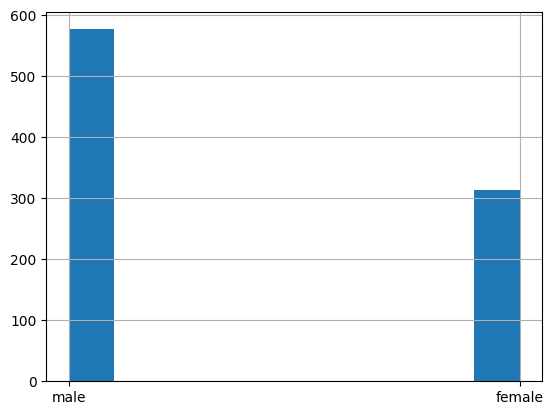

In [10]:
df.Sex.hist()

<Axes: >

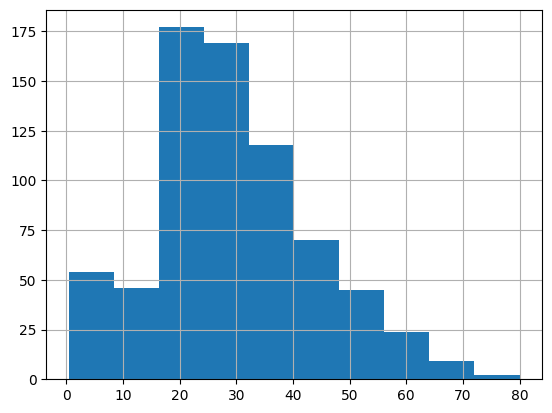

In [11]:
df.Age.hist()

<Axes: >

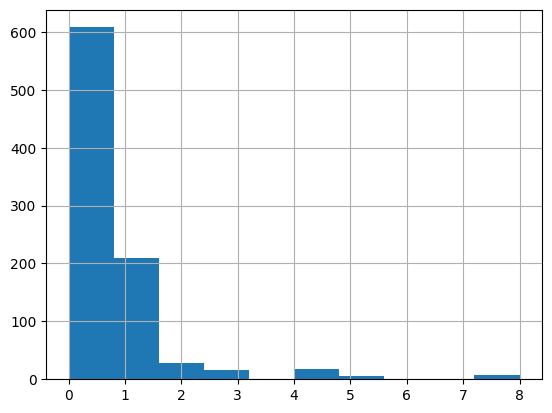

In [12]:
df.SibSp.hist()

<Axes: >

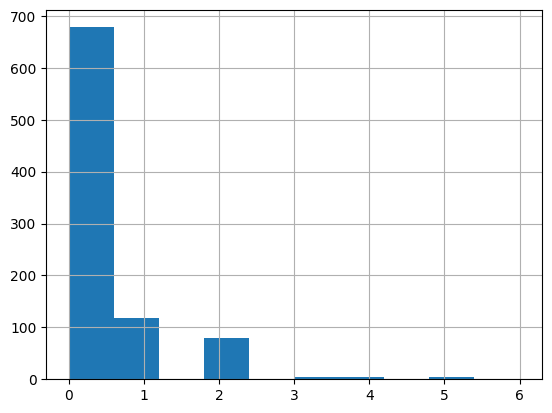

In [13]:
df.Parch.hist()

<Axes: >

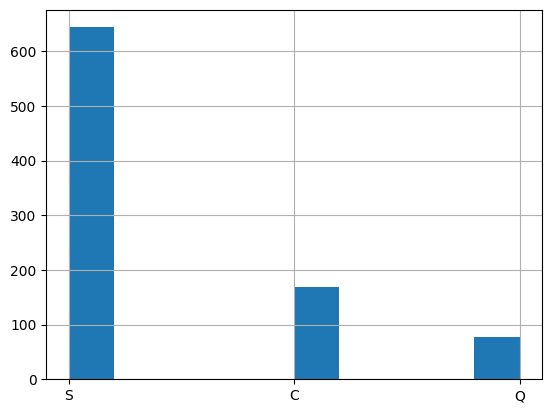

In [14]:
df.Embarked.hist()

<Axes: >

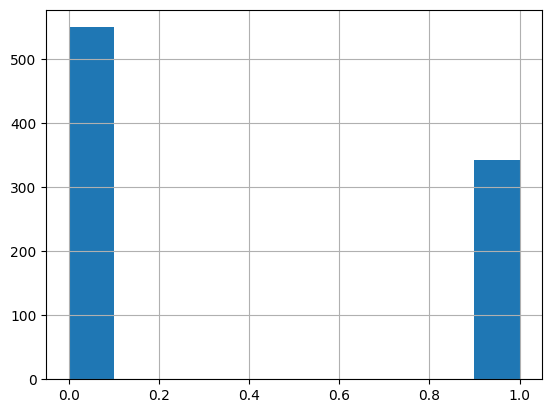

In [15]:
df.Survived.hist()

       Survived
            sum
Pclass         
1           136
2            87
3           119


<Axes: title={'center': 'The number of survivors by ticket class'}, ylabel='Frequency'>

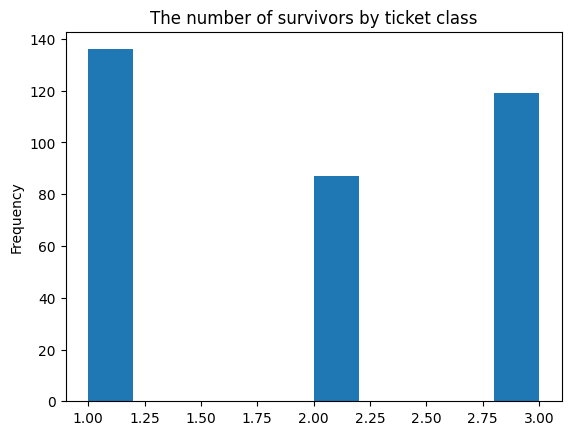

In [16]:
# The number of survivors by ticket class
print(df[['Pclass', 'Survived']].groupby('Pclass').agg(['sum']))

df.loc[df.Survived == 1]['Pclass'].plot(kind='hist', title='The number of survivors by ticket class')

         Survived
              sum
Embarked         
C              93
Q              30
S             217


<Axes: >

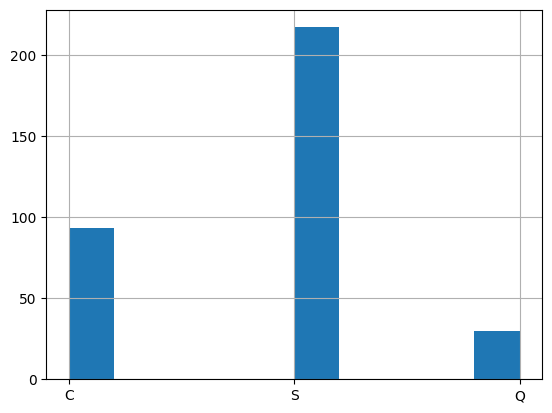

In [17]:
# The number of survivors by port of departure
print(df[['Embarked', 'Survived']].groupby('Embarked').agg(['sum']))

df.loc[df.Survived == 1]['Embarked'].hist()

       Survived
            sum
Sex            
female      233
male        109


<Axes: >

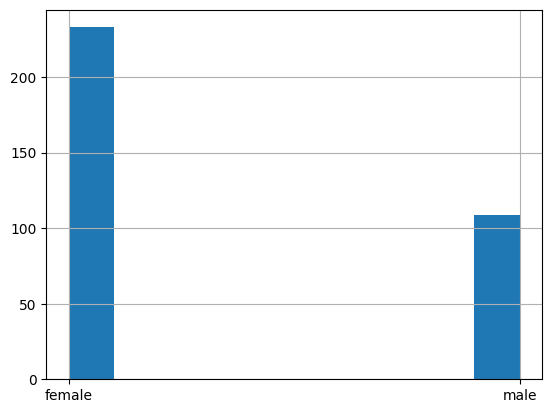

In [18]:
# The number of survivors by sex
print(df[['Sex', 'Survived']].groupby('Sex').agg(['sum']))

df.loc[df.Survived == 1]['Sex'].hist()

       Survived
            sum
Pclass         
1            91
2            70
3            72


<Axes: >

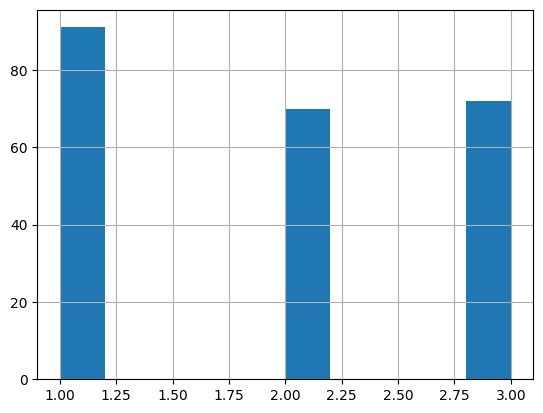

In [19]:
# The number of surviving women by ticket class
print(df[['Pclass', 'Survived']][df.Sex == 'female'].groupby('Pclass').agg(['sum']))

df.loc[(df.Survived == 1) & (df.Sex == 'female')]['Pclass'].hist()

       Survived
            sum
Pclass         
1            45
2            17
3            47


<Axes: >

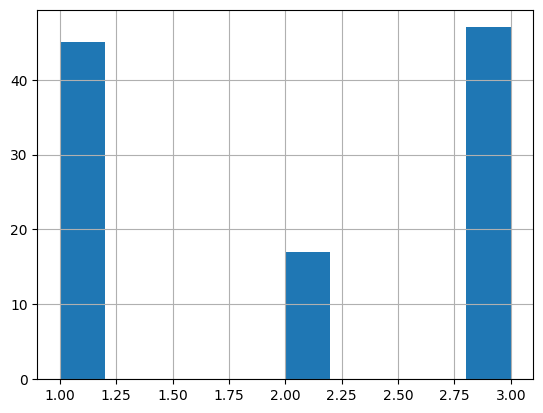

In [20]:
# The number of surviving men by ticket class
print(df[['Pclass', 'Survived']][df.Sex == 'male'].groupby('Pclass').agg(['sum']))

df.loc[(df.Survived == 1) & (df.Sex == 'male')]['Pclass'].hist()

<Axes: >

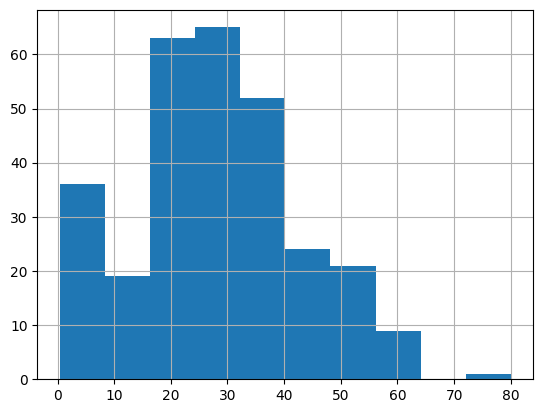

In [21]:
# The number of survivors by age
df.loc[df.Survived == 1]['Age'].hist()

<Axes: >

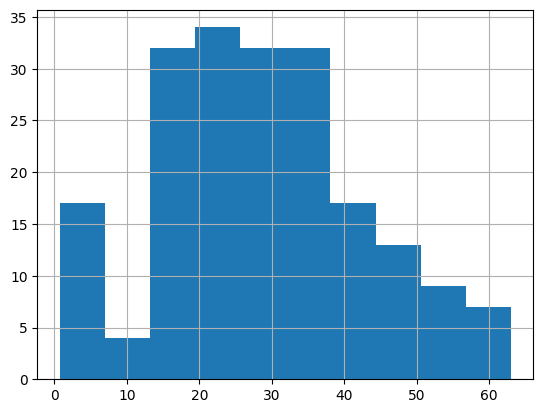

In [22]:
# The number of surviving women by age
df.loc[(df.Survived == 1) & (df.Sex == 'female')]['Age'].hist()

<Axes: >

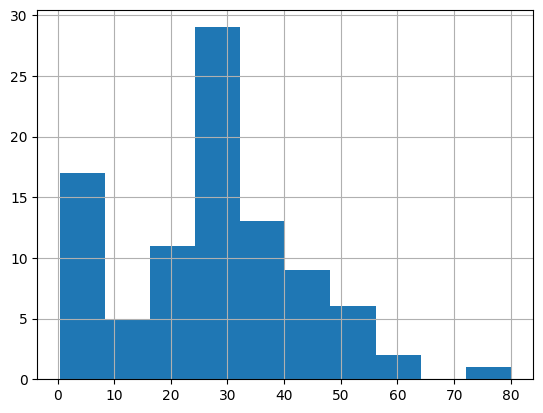

In [23]:
# The number of surviving men by age
df.loc[(df.Survived == 1) & (df.Sex == 'male')]['Age'].hist()

<Axes: >

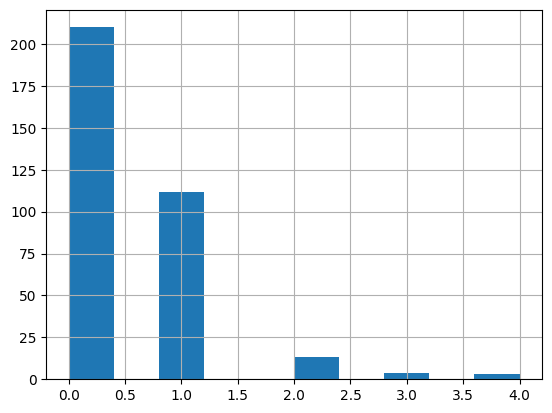

In [24]:
# The number of survivors by SibSp
df.loc[df.Survived == 1]['SibSp'].hist()

<Axes: >

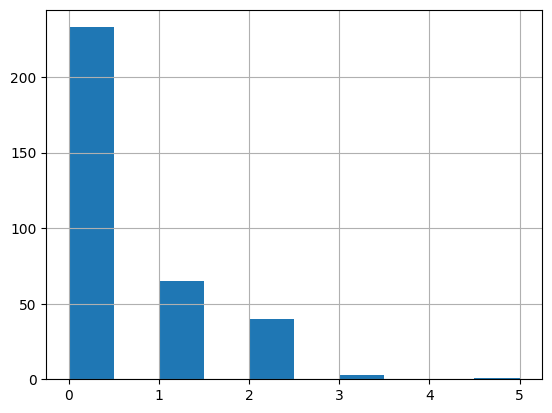

In [25]:
# The number of survivors by Parch
df.loc[df.Survived == 1]['Parch'].hist()

In [26]:
# avg, max, min ticket price depends on the port of departure
df[['Embarked', 'Fare']].groupby('Embarked').agg(['mean', 'max', 'min'])

Fare                  
               mean       max     min
Embarked                             
C         59.954144  512.3292  4.0125
Q         13.276030   90.0000  6.7500
S         27.079812  263.0000  0.0000

In [27]:
# avg, max, min ticket price depends on the port of departure and ticket class
df[['Embarked', 'Fare', 'Pclass']].groupby(['Embarked', 'Pclass']).agg(['max', 'min'])

Fare         
                      max      min
Embarked Pclass                   
C        1       512.3292  26.5500
         2        41.5792  12.0000
         3        22.3583   4.0125
Q        1        90.0000  90.0000
         2        12.3500  12.3500
         3        29.1250   6.7500
S        1       263.0000   0.0000
         2        73.5000   0.0000
         3        69.5500   0.0000

In [28]:
# avg, max, min age of passengers
df['Age'].agg(['mean', 'max', 'min'])

mean    29.699118
max     80.000000
min      0.420000
Name: Age, dtype: float64

In [29]:
# avg, max, min age of surviving passengers
df['Age'][df.Survived == 1].agg(['mean', 'max', 'min'])

mean    28.34369
max     80.00000
min      0.42000
Name: Age, dtype: float64

In [30]:
# avg, max, min age of female survivors
df['Age'][(df.Survived == 1) & (df.Sex == 'female')].agg(['mean', 'max', 'min'])

mean    28.847716
max     63.000000
min      0.750000
Name: Age, dtype: float64

In [31]:
# avg, max, min age of male survivors
df['Age'][(df.Survived == 1) & (df.Sex == 'male')].agg(['mean', 'max', 'min'])

mean    27.276022
max     80.000000
min      0.420000
Name: Age, dtype: float64

In [32]:
df['LastName'] = df.Name.apply(lambda x: x.split(',')[0])

In [33]:
# Passengers who traveled alone
alone_passengers = df[(df.SibSp == 0) & (df.Parch == 0)]
alone_passengers.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Moran
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,McCarthy
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,Bonnell


<Axes: >

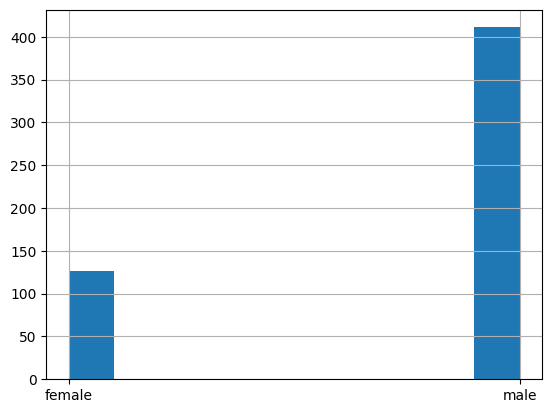

In [34]:
# Passengers who traveled alone by sex
alone_passengers['Sex'].hist()

<Axes: >

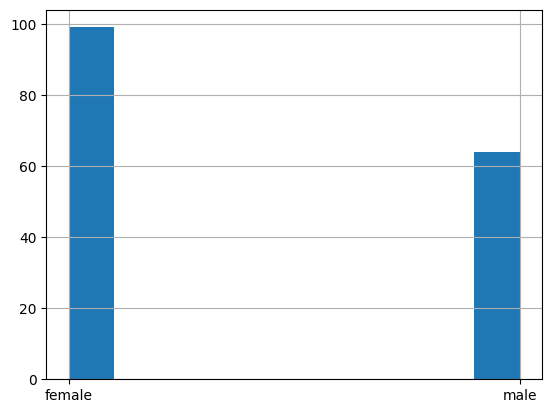

In [35]:
# Survivors who traveled alone by sex
alone_passengers.loc[alone_passengers.Survived == 1]['Sex'].hist()

<Axes: >

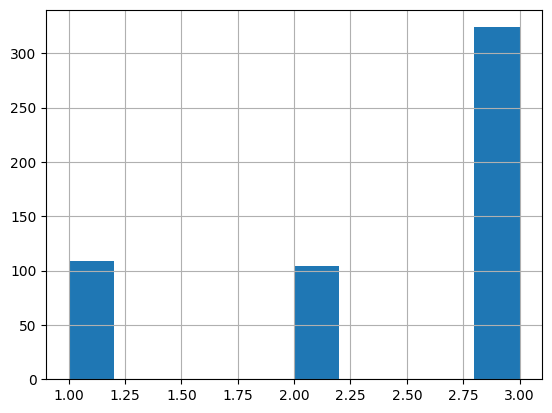

In [36]:
# Passengers who traveled alone by ticket class
alone_passengers['Pclass'].hist()

<Axes: >

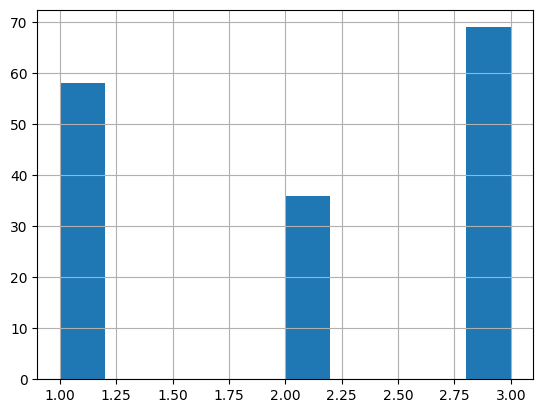

In [37]:
# Survivors who traveled alone by ticket class
alone_passengers.loc[alone_passengers.Survived == 1]['Pclass'].hist()

<Axes: >

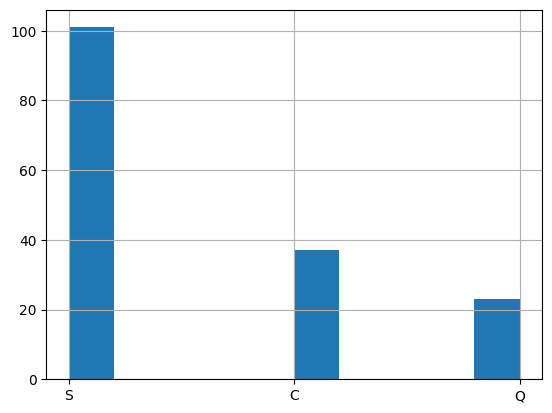

In [38]:
# Survivors who traveled alone by port of departure
alone_passengers.loc[alone_passengers.Survived == 1]['Embarked'].hist()

In [39]:
# Passengers who traveled with family
passengers_with_family = df[(df.SibSp != 0) | (df.Parch != 0)]
passengers_with_family.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Palsson
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Johnson


In [40]:
passengers_with_family.shape

(354, 13)

<Axes: >

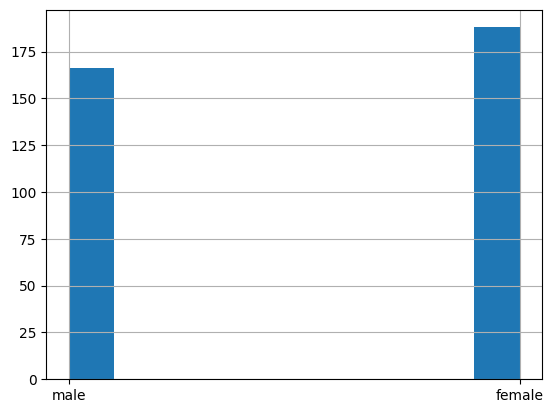

In [42]:
# Passengers who traveled with family by sex
passengers_with_family['Sex'].hist()

<Axes: >

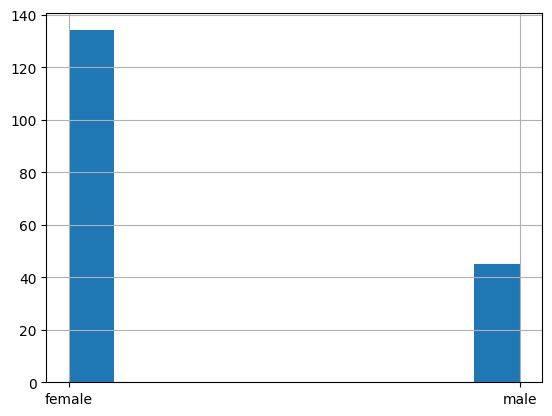

In [43]:
# Survivors who traveled with family by sex
passengers_with_family.loc[passengers_with_family.Survived == 1]['Sex'].hist()

<Axes: >

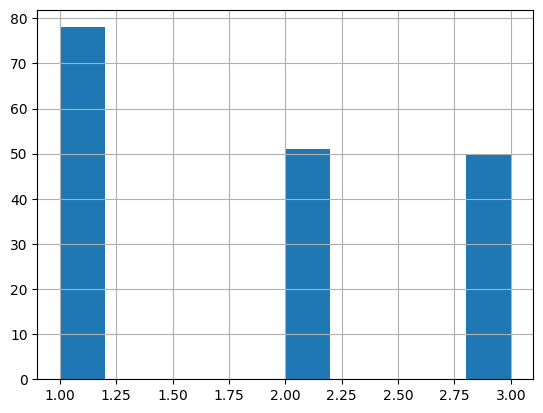

In [44]:
# Survivors who traveled with family by ticket class
passengers_with_family.loc[passengers_with_family.Survived == 1]['Pclass'].hist()

<Axes: >

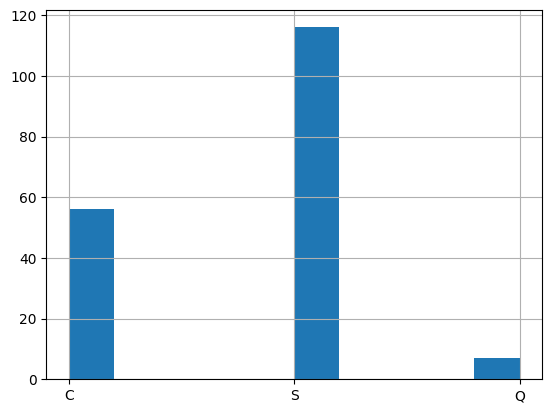

In [45]:
# Survivors who traveled with family by port of departure
passengers_with_family.loc[passengers_with_family.Survived == 1]['Embarked'].hist()

In [46]:
# Married couples
prospective_spouses = passengers_with_family[(passengers_with_family.SibSp == 1) & (passengers_with_family.Age >= 18)]
spouses = prospective_spouses[['LastName', 'Ticket']].groupby([prospective_spouses.LastName, prospective_spouses.Ticket]).count()
print(f'Number of married couples: {len(spouses[spouses.LastName == 2])}')

Number of married couples: 34


In [47]:
# Parents-children
parents_children = passengers_with_family[passengers_with_family.Parch > 0]
parents_children = parents_children[['LastName', 'Ticket']].groupby([parents_children.LastName, parents_children.Ticket]).count()
print(f'Number of parents-children: {len(parents_children)}')

Number of parents-children: 104


In [48]:
# Brothers-sisters
brothers_sisters = passengers_with_family[passengers_with_family.SibSp > 0]
brothers_sisters = brothers_sisters[['LastName', 'Ticket']].groupby([brothers_sisters.LastName, brothers_sisters.Ticket]).count()
print(f'Number of brothers-sisters: {len(brothers_sisters)}')

Number of brothers-sisters: 167
